In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [92]:
!pip install pydot

import pydot
from IPython.core.display import Image 

In [63]:
dbt = pd.read_csv('diabetes.csv')

In [64]:
dbt.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [65]:
dbt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [66]:
X = dbt.drop(['Outcome'], axis=1)
y = dbt[['Outcome']]

In [67]:
print(X.columns)
print(X.shape)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
(768, 8)


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [69]:
clf_1 = DecisionTreeClassifier(random_state=0)
tree_nottuned = clf_1.fit(X_train, y_train)

In [94]:
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

In [93]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [95]:
draw_decision_tree(tree_nottuned, X.columns, y.columns[0])

FileNotFoundError: [WinError 2] "dot" not found in path.

In [72]:
from sklearn.model_selection import GridSearchCV

hyperparamters = {'max_depth': list(range(2, 8)),  'min_samples_split': list(range(5, 30)), 'max_leaf_nodes': list(range(5, 15))}

GridCV = GridSearchCV(estimator=tree_nottuned, param_grid=hyperparamters, cv=5, verbose=1)

In [73]:
GridCV.fit(X_train, y_train)
GridCV.best_params_ 

Fitting 5 folds for each of 1500 candidates, totalling 7500 fits


{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_split': 5}

In [74]:
clf_2 = DecisionTreeClassifier(max_depth=4, min_samples_split=5, max_leaf_nodes=5, random_state=0)
tree_pre_tuned = clf_2.fit(X_train, y_train)

In [96]:
draw_decision_tree(tree_pre_tuned, X.columns, y.columns[0])


FileNotFoundError: [WinError 2] "dot" not found in path.

In [76]:
from sklearn.metrics import accuracy_score

y_pred=clf_1.predict(X_test)
print("No Tuning : Accuracy =", accuracy_score(y_pred,y_test))

No Tuning : Accuracy = 0.71875


In [77]:
y_pred=clf_2.predict(X_test)
print("Pre Tuning : Accuracy =", accuracy_score(y_pred,y_test))

Pre Tuning : Accuracy = 0.75


In [78]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


In [79]:
clf = DecisionTreeClassifier(random_state=0)

path = clf.cost_complexity_pruning_path(X_train, y_train)

ccp_alphas, impurities = path.ccp_alphas, path.impurities


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

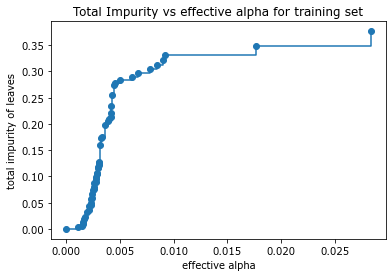

In [80]:

fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")


In [81]:
clfs = []
count = 0
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf = clf.fit(X_train, y_train)
    count += 1
    print("Number of nodes in the {}th tree is: {} with ccp_alpha: {}".format(
      count, clf.tree_.node_count, ccp_alpha))
    clfs.append(clf)

Number of nodes in the 1th tree is: 215 with ccp_alpha: 0.0
Number of nodes in the 2th tree is: 209 with ccp_alpha: 0.0011322463768115932
Number of nodes in the 3th tree is: 205 with ccp_alpha: 0.0015190972222222222
Number of nodes in the 4th tree is: 201 with ccp_alpha: 0.0015625000000000005
Number of nodes in the 5th tree is: 197 with ccp_alpha: 0.0016025641025641019
Number of nodes in the 6th tree is: 189 with ccp_alpha: 0.0016422672672672671
Number of nodes in the 7th tree is: 185 with ccp_alpha: 0.0017206101190476164
Number of nodes in the 8th tree is: 175 with ccp_alpha: 0.0019755747126436784
Number of nodes in the 9th tree is: 171 with ccp_alpha: 0.0020833333333333333
Number of nodes in the 10th tree is: 165 with ccp_alpha: 0.0021396553325901155
Number of nodes in the 11th tree is: 159 with ccp_alpha: 0.0023148148148148147
Number of nodes in the 12th tree is: 159 with ccp_alpha: 0.0023148148148148147
Number of nodes in the 13th tree is: 153 with ccp_alpha: 0.0023158575241908584


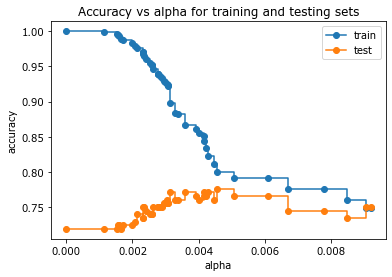

Decision tree without pruning : 215 nodes, 0.719 accuracy
Decision tree with the best pruning : 21 nodes, 0.776 accuracy


In [82]:
clfs = clfs[:-3]
ccp_alphas = ccp_alphas[:-3]

train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

print("Decision tree without pruning : {0} nodes, {1:.3} accuracy".format(tree_nottuned.tree_.node_count, tree_nottuned.score(X_test, y_test)))
print("Decision tree with the best pruning : {0} nodes, {1:.3} accuracy".format(clfs[test_scores.index(max(test_scores))].tree_.node_count, max(test_scores)))

In [83]:
clf_3 = DecisionTreeClassifier(random_state=0, ccp_alpha=0.0046)
tree_post_tuned = clf_3.fit(X_train, y_train)

In [84]:
draw_decision_tree(tree_post_tuned, X.columns, y.columns[0])


FileNotFoundError: [WinError 2] "dot" not found in path.

In [86]:
y_pred=clf_1.predict(X_test)
print("No Tuning : Accuracy =", accuracy_score(y_pred,y_test))

No Tuning : Accuracy = 0.71875


In [88]:
y_pred=clf_3.predict(X_test)
print("Post Tuning : Accuracy =", accuracy_score(y_pred,y_test))

Post Tuning : Accuracy = 0.7760416666666666
